In [1]:
from imports import *
from information_conditions import Information_Conditions
from base_ecopg import BaseEcologicalPublicGood
from helper_functions import *
from simulation_and_results_functions import *

In [2]:

ecopg = BaseEcologicalPublicGood()

In [19]:
agent_1_strategy = [0,0,0,1]
agent_2_strategy = [0,0,0,0]


agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy], dtype='float')

In [5]:
information_condition_instance_only_action = Information_Conditions(ecopg, mode= "only_action_history_information")
mae_ecopg_only_action = POstratAC(env=information_condition_instance_only_action, learning_rates=0.05, discount_factors= 0.98)


information_condition_instance_both_state_and_action = Information_Conditions(ecopg, mode= "both_state_and_action_information")
mae_ecopg_both_state_and_action = POstratAC(env=information_condition_instance_both_state_and_action, learning_rates=0.05, discount_factors= 0.98)

In [19]:
agent_1_strategy = [0,0,0,1]
agent_2_strategy = [1,0,0,1]


agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy])

result = run_simulation_for_initial_condition_with_traj(
            mae = mae_ecopg_only_action, 
            initial_condition = starting_point,
            make_degraded_state_cooperation_probablity_zero_at_end= True,
            make_degraded_state_obsdist_zero_at_end= True
        )
final_point = result["final_point"]
print(final_point, "result final point")
print(result["obsdist"], "result obsdist")
print("------")



[[[0 1]
  [0 1]
  [0 1]
  [1 0]]

 [[1 0]
  [0 1]
  [0 1]
  [1 0]]] result final point
[[0.33333328 0.         0.3333333  0.33333337]
 [0.33333328 0.         0.3333333  0.33333337]] result obsdist
------


In [20]:
agent_1_strategy = [0,0,0,1]
agent_2_strategy = [1,0,0,1]


agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy])

random_initial_conditions_around_point = generate_random_initial_conditions_around_point(mae_ecopg_only_action, starting_point, 20, 0.05)

results_list = []
for initial_condition in random_initial_conditions_around_point:
    result = run_simulation_for_initial_condition_with_traj(
            mae = mae_ecopg_only_action, 
            initial_condition = initial_condition,
            make_degraded_state_cooperation_probablity_zero_at_end= True,
            make_degraded_state_obsdist_zero_at_end= True
        )
    results_list.append(result)

final_points = [result['final_point'] for result in results_list]


make_plots(information_condition_instance_only_action, mae_ecopg_only_action, results_list)


TypeError: generate_random_initial_conditions_around_point() missing 1 required positional argument: 'mode'

('ALL D', 'other')
Classified final points: [('ALL D', 'GT'), ('other', 'other'), ('other', 'ALL D'), ('other', 'ALL D'), ('ALL D', 'ALL D')]


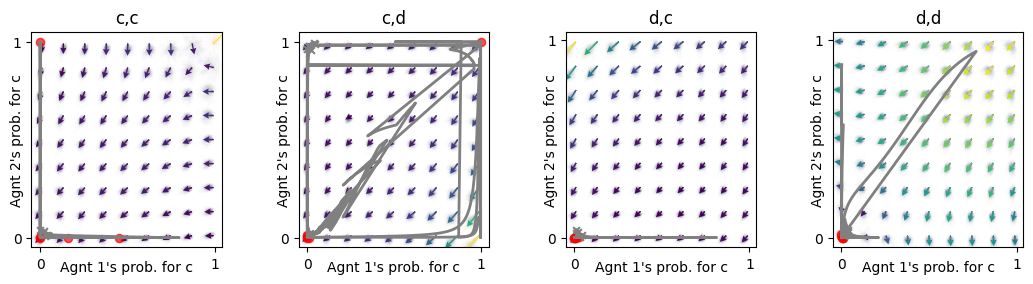

In [ ]:
information_condition_instance_both_state_and_action = Information_Conditions(ecopg, mode= "both_state_and_action_information")
mae_ecopg_both_state_and_action = POstratAC(env=information_condition_instance_both_state_and_action, learning_rates=0.05, discount_factors= 0.98)

agent_1_strategy = [0,0,0,0]
agent_2_strategy = [0,0,0,0]

for i in [0, 2, 4, 6]:
    agent_1_strategy.insert(i, 0.5)
    agent_2_strategy.insert(i, 0.5)

agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy])

print(classify_final_point(starting_point))

random_initial_conditions_around_point = generate_random_initial_conditions_around_point(mae_ecopg_only_action, starting_point, 5, 0.05)

results_list = []
for initial_condition in random_initial_conditions_around_point:
    result = run_simulation_for_initial_condition_with_traj(
            mae = mae_ecopg_only_action, 
            initial_condition = initial_condition,
            make_degraded_state_cooperation_probablity_zero_at_end= False,
            make_degraded_state_obsdist_zero_at_end= False
        )  
    results_list.append(result)

final_points = [result['final_point'] for result in results_list]


classifed_points = [classify_final_point(final_point) for final_point in final_points]
print("Classified final points:", classifed_points)

make_plots(information_condition_instance_only_action, mae_ecopg_only_action, results_list)


In [29]:
generate_random_initial_conditions_around_point(mae_ecopg_both_state_and_action, starting_point, 3, 0.05, "both_state_and_action_information")

[array([[[0.6520474 , 0.3479526 ],
         [0.01955663, 0.98044337],
         [0.58310928, 0.41689072],
         [0.03449225, 0.96550775],
         [0.34109008, 0.65890992],
         [0.04206694, 0.95793306],
         [0.42400102, 0.57599898],
         [0.97456349, 0.02543651]],
 
        [[0.24774051, 0.75225949],
         [0.0377491 , 0.9622509 ],
         [0.4835684 , 0.5164316 ],
         [0.01807796, 0.98192204],
         [0.90978257, 0.09021743],
         [0.02493192, 0.97506808],
         [0.43601667, 0.56398333],
         [0.0321321 , 0.9678679 ]]]),
 array([[[0.35186282, 0.64813718],
         [0.04669075, 0.95330925],
         [0.82723003, 0.17276997],
         [0.0133723 , 0.9866277 ],
         [0.65173205, 0.34826795],
         [0.00660888, 0.99339112],
         [0.72225037, 0.27774963],
         [0.96550149, 0.03449851]],
 
        [[0.82049475, 0.17950525],
         [0.02621563, 0.97378437],
         [0.22332038, 0.77667962],
         [0.03338076, 0.96661924],
         [0

In [56]:
def check_for_stability(final_point, mode):
    
    information_condition_instance =  Information_Conditions(ecopg, mode= mode)
    mae = POstratAC(env=information_condition_instance, learning_rates=0.05, discount_factors= 0.98)


    random_initial_conditions_around_point = generate_random_initial_conditions_around_point(mae, final_point, 3, 0.05, mode)
    results_list = []
    for initial_condition in random_initial_conditions_around_point:
        result = run_simulation_for_initial_condition_with_traj(
                mae = mae, 
                initial_condition = initial_condition,
                make_degraded_state_cooperation_probablity_zero_at_end= False,
                make_degraded_state_obsdist_zero_at_end= False
            )  
        results_list.append(result)

    new_final_points = [np.round(result['final_point'],1) for result in results_list]
    if mode == 'both_state_and_action_information' or  mode == 'only_state_information':
        new_final_points = [new_final_point[:, 1::2,:] for new_final_point in new_final_points]
    # print(new_final_points)
    checking_if_same = [np.allclose(new_final_point, (final_point)) for new_final_point in new_final_points]
    if np.all(checking_if_same) == True:
        return 'stable'
    else:
        return 'unstable'

In [75]:
agent_1_strategy = [0,0,0,1]
agent_2_strategy = [0,0,0,1]


agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy], dtype='float')




check_for_stability(starting_point, "both_state_and_action_information")

'stable'

In [ ]:
agent_1_strategy = [0,1,0,0]
agent_2_strategy = [0,0,0,0]

# for i in [0, 2, 4, 6]:
#     agent_1_strategy.insert(i, 0.5)
#     agent_2_strategy.insert(i, 0.5)

agent_1_strategy = [[x, 1-x] for x in agent_1_strategy]
agent_2_strategy = [[x, 1-x] for x in agent_2_strategy]

starting_point = np.array([agent_1_strategy, agent_2_strategy])


check_for_stability(starting_point)

'unstable'

In [ ]:
#pull out results from the results and label.
#convert results to numpy array
#for each point simulate points near it. if all converge to same point. yes
#can check if just simulating initial condition, means same obsdist

In [72]:
def convert_final_point_to_numpy_array(final_point, number_of_states):

    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_states , 2)
    return array

In [74]:
df = pd.read_excel("both_state_and_action_only_prosperous_classified.xlsx")

df["final_point"] = df["final_point"].apply(lambda x: convert_final_point_to_numpy_array(x, 4))
df["stability"] = df["final_point"].apply(lambda x: check_for_stability(x,"both_state_and_action_information"))

df.to_excel("both_state_and_action_only_prosperous_classified_with_stability.xlsx")